In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cPickle

/Users/Ryosuke/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Ryosuke/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def unpickle(f):
    fo = open(f,'rb')
    d = cPickle.load(fo)
    fo.close()
    return d

In [12]:
def load_cifar10(dir):
    train_data=[]
    train_target=[]
    
    for i in range(1,6):
        d = unpickle('%s/data_batch_%d' %(dir,i))
        train_data.extend(d['data'])
        train_target.extend(d['labels'])
        
    d = unpickle('%s/test_batch' %(dir))
    test_data = d['data']
    test_target = d['labels']
    
    train_data = np.array(train_data,dtype=np.float32)
    train_target = np.array(train_target,dtype=np.int32)
    test_data = np.array(test_data,dtype=np.float32)
    test_target = np.array(test_target,dtype=np.int32)
    
    train_data /=255.0
    test_data /=255.0
    
    return train_data,test_data,train_target,test_target

In [13]:
X_train,X_test,y_train,y_test = load_cifar10("cifar-10-batches-py")

In [14]:
X_train = X_train.reshape((len(X_train),3,32,32))
X_test = X_test.reshape((len(X_test),3,32,32))

In [16]:
from keras.utils import np_utils
nb_classes =10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.


In [17]:
y_test
#y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [31]:
from keras.models import Sequential
from keras.layers import Dense,Activation,MaxPooling2D,Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.optimizers import SGD,Adam

In [13]:
batch_size = 32
nb_classes = 10
nb_epoch = 20

model = Sequential()
model.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model.add(Dense(output_dim=10,input_dim=512))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '15805' (I am process '16102')


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 97s - loss: 1.4789 - acc: 0.4707 - val_loss: 1.2429 - val_acc: 0.5592
Epoch 2/20
50000/50000 [==============================] - 99s - loss: 1.1284 - acc: 0.6043 - val_loss: 1.1451 - val_acc: 0.5993
Epoch 3/20
50000/50000 [==============================] - 97s - loss: 0.9393 - acc: 0.6696 - val_loss: 1.0404 - val_acc: 0.6397
Epoch 4/20
50000/50000 [==============================] - 97s - loss: 0.7691 - acc: 0.7282 - val_loss: 1.0752 - val_acc: 0.6366
Epoch 5/20
50000/50000 [==============================] - 97s - loss: 0.6017 - acc: 0.7879 - val_loss: 1.0942 - val_acc: 0.6513
Epoch 6/20
50000/50000 [==============================] - 97s - loss: 0.4411 - acc: 0.8464 - val_loss: 1.1612 - val_acc: 0.6528
Epoch 7/20
50000/50000 [==============================] - 97s - loss: 0.3061 - acc: 0.8947 - val_loss: 1.2746 - val_acc: 0.6526
Epoch 8/20
50000/50000 [==============================

In [16]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

    # fit the model on the batches generated by datagen.flow()
model.fit_generator(datagen.flow(X_train, y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, y_test))

Epoch 1/20
50000/50000 [==============================] - 109s - loss: 1.2809 - acc: 0.5903 - val_loss: 1.0383 - val_acc: 0.6454
Epoch 2/20
50000/50000 [==============================] - 112s - loss: 1.0463 - acc: 0.6423 - val_loss: 0.9765 - val_acc: 0.6671
Epoch 3/20
50000/50000 [==============================] - 107s - loss: 0.9769 - acc: 0.6624 - val_loss: 0.9561 - val_acc: 0.6689
Epoch 4/20
50000/50000 [==============================] - 110s - loss: 0.9234 - acc: 0.6823 - val_loss: 0.9131 - val_acc: 0.6891
Epoch 5/20
50000/50000 [==============================] - 108s - loss: 0.8927 - acc: 0.6923 - val_loss: 0.8941 - val_acc: 0.6953
Epoch 6/20
50000/50000 [==============================] - 109s - loss: 0.8622 - acc: 0.7016 - val_loss: 0.9024 - val_acc: 0.6966
Epoch 7/20
50000/50000 [==============================] - 109s - loss: 0.8361 - acc: 0.7115 - val_loss: 0.8954 - val_acc: 0.6880
Epoch 8/20
50000/50000 [==============================] - 111s - loss: 0.8171 - acc: 0.7164 - val

In [28]:
from keras.utils.visualize_util import plot
plot(model, to_file='model.png')

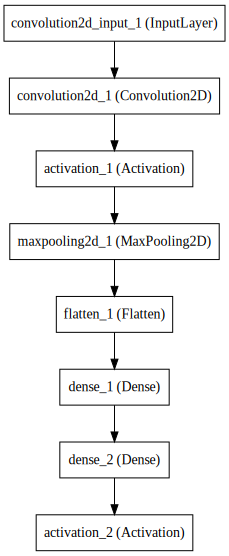

In [29]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [33]:
model2 = Sequential()
model2.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model2.add(Dense(output_dim=10,input_dim=512))
model2.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model2.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 105s - loss: 1.5932 - acc: 0.4097 - val_loss: 1.3395 - val_acc: 0.5020
Epoch 2/20
50000/50000 [==============================] - 105s - loss: 1.2088 - acc: 0.5596 - val_loss: 1.1580 - val_acc: 0.5870
Epoch 3/20
50000/50000 [==============================] - 104s - loss: 1.0656 - acc: 0.6163 - val_loss: 1.0398 - val_acc: 0.6268
Epoch 4/20
50000/50000 [==============================] - 105s - loss: 0.9622 - acc: 0.6581 - val_loss: 0.9713 - val_acc: 0.6564
Epoch 5/20
50000/50000 [==============================] - 105s - loss: 0.8947 - acc: 0.6823 - val_loss: 0.9932 - val_acc: 0.6492
Epoch 6/20
50000/50000 [==============================] - 105s - loss: 0.8443 - acc: 0.7040 - val_loss: 1.1035 - val_acc: 0.6300
Epoch 7/20
50000/50000 [==============================] - 105s - loss: 0.8008 - acc: 0.7193 - val_loss: 0.8889 - val_acc: 0.6866
Epoch 8/20
50000/50000 [=======================

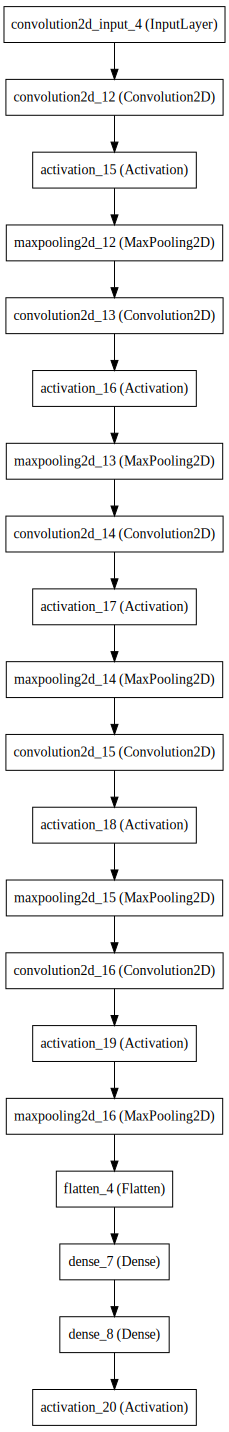

In [34]:
SVG(model_to_dot(model2).create(prog='dot', format='svg'))